# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## Importações

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Pré-processamento de dados em Python 

In [3]:
#Conhecendo o dataset
black_friday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Linhas x Colunas
black_friday.shape

(537577, 12)

In [5]:
#Obtendo um resumo estatístico do conjunto de dados. 
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
#Verificando se há valores nulos 
black_friday.isnull().sum().sort_values(ascending=False).head(10)

Product_Category_3            373299
Product_Category_2            166986
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
dtype: int64

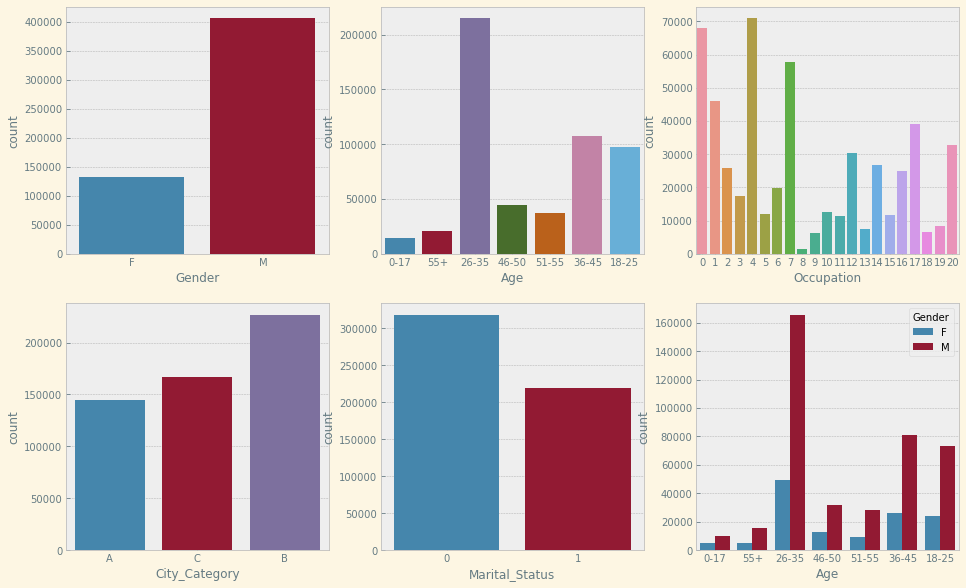

In [7]:
#Plotando alguns gráficos
plt.style.use('bmh')
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot('Gender',data=black_friday,ax=axes[0,0])
sns.countplot('Age',data=black_friday,ax=axes[0,1])
sns.countplot('Occupation',data=black_friday,ax=axes[0,2])
sns.countplot('City_Category',data=black_friday,ax=axes[1,0])
sns.countplot('Marital_Status',data=black_friday,ax=axes[1,1])
sns.countplot(black_friday['Age'],hue=black_friday['Gender'],data=black_friday,ax=axes[1,2])

#sns.countplot('Product_Category_1',data=black_friday,ax=axes[2,0])
#sns.countplot('Product_Category_2',data=black_friday,ax=axes[2,1])
#sns.countplot('Product_Category_3',data=black_friday,ax=axes[2,2])


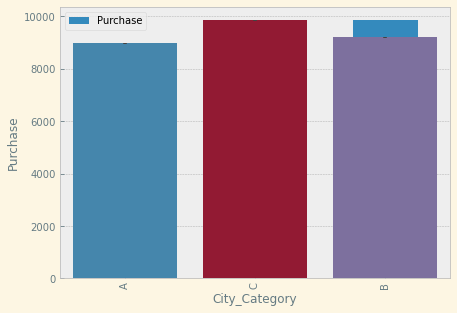

In [8]:
#Analizando qual categoria de cidade afeta mais na compra.
#As pessoas pertencentes à categoria C tendem a gastar um pouco mais. 
plt.rcParams['figure.figsize'] = (7,5)
black_friday[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = black_friday)
plt.show()

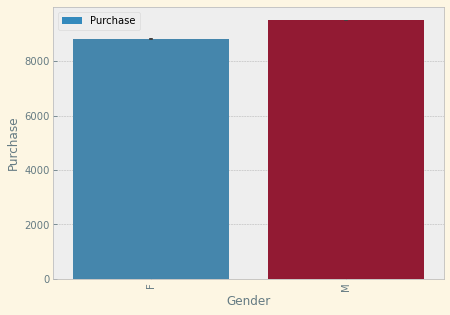

In [9]:
#Analizando qual gênero gasta mais
#Homens gastam mais que as mulheres
black_friday[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = black_friday)
plt.show()

## Resolução das Questões

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [10]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return black_friday.shape
    pass

In [11]:
q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [12]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return black_friday.query("Gender == 'F' & Age == '26-35'").shape[0]
    pass

In [13]:
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [14]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return black_friday['User_ID'].nunique()
    pass

In [15]:
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [16]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return black_friday.dtypes.nunique()
    pass

In [17]:
q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [18]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return max(black_friday.isnull().sum()) / black_friday.shape[0]
    pass

In [19]:
q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [20]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return max(black_friday.isnull().sum())
    pass

In [21]:
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [22]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return black_friday['Product_Category_3'].value_counts().idxmax()
    pass

In [23]:
q7()

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [24]:
def q8():
    # Retorne aqui o resultado da questão 8.
    min_max = MinMaxScaler()
    normalize = min_max.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
    return float(normalize.mean())
    pass

In [25]:
q8()

0.3847939036269795

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [26]:
def q9():
    # Retorne aqui o resultado da questão 9.
    standard = StandardScaler()
    normalize = standard.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
    return len(normalize[(normalize >= -1) & (normalize <= 1)])
    pass

In [27]:
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [28]:
def q10():
    # Retorne aqui o resultado da questão 10.
    data = black_friday[black_friday['Product_Category_2'].isnull()]
    return bool(data['Product_Category_2'].sum() == data['Product_Category_3'].sum())
    pass

In [30]:
!pip freeze > requirements.txt    

### Bibliografia

- https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428   
- https://scikit-learn.org/stable/modules/preprocessing.html 